#Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

#Downloading and Visualising data

In [2]:
batch_size = 128
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
classes = ('0','1','2','3','4','5','6','7','8','9')

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([128, 1, 28, 28])
torch.Size([1, 28, 28])
6


In [5]:
img = images[0]
npimg = img.numpy()
npimg = np.transpose(npimg,(1,2,0)).reshape(28,-1)
print(npimg.shape)

(28, 28)


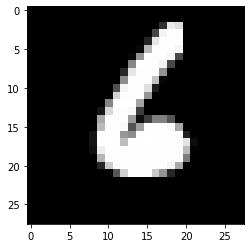

In [6]:
plt.figure
plt.imshow(npimg,cmap='gray')
plt.show()

In [7]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

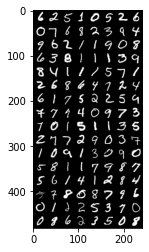

6 2 5 1 0 5 2 6 0 7 6 8 2 3 9 4 9 6 2 1 1 9 0 8 6 3 8 1 1 1 3 9 8 4 1 1 1 5 7 1 2 6 8 6 4 7 2 4 6 1 7 5 2 2 5 9 7 7 9 4 0 9 7 3 7 0 1 5 1 1 3 5 2 7 7 2 9 0 3 7 1 0 9 1 3 0 9 0 5 8 1 1 7 9 8 7 5 6 1 4 1 2 8 4 5 7 8 0 8 7 9 6 0 1 2 2 5 3 7 0 0 8 6 2 3 5 0 8


In [8]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(128)))

#LeNet

In [9]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(1,6,5),
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2),
        nn.Conv2d(6,16,5),
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(256,120),
        nn.ReLU(),
        nn.Linear(120,84),
        nn.ReLU(),
        nn.Linear(84,10)
    )

  def forward(self,x):
    x=self.cnn_model(x)
    x=x.view(x.size(0),-1)
    x=self.fc_model(x)
    return x

In [10]:
net = LeNet()

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [12]:
def evaluation(dataloader):
  total,correct=0,0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [13]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

**Training**

In [19]:
%%time
max_epochs = 32

for epoch in range(max_epochs):
    

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/32
Epoch: 1/32
Epoch: 2/32
Epoch: 3/32
Epoch: 4/32
Epoch: 5/32
Epoch: 6/32
Epoch: 7/32
Epoch: 8/32
Epoch: 9/32
Epoch: 10/32
Epoch: 11/32
Epoch: 12/32
Epoch: 13/32
Epoch: 14/32
Epoch: 15/32
Epoch: 16/32
Epoch: 17/32
Epoch: 18/32
Epoch: 19/32
Epoch: 20/32
Epoch: 21/32
Epoch: 22/32
Epoch: 23/32
Epoch: 24/32
Epoch: 25/32
Epoch: 26/32
Epoch: 27/32
Epoch: 28/32
Epoch: 29/32
Epoch: 30/32
Epoch: 31/32
CPU times: user 4min 29s, sys: 2.42 s, total: 4min 31s
Wall time: 4min 31s


In [20]:
print("Test accuracy: %0.2f, Train accuracy: %0.2f" %(evaluation(testloader),evaluation(trainloader)))

Test accuracy: 99.14, Train accuracy: 99.88
